In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('train_clean_for_eda.csv')
session = pd.read_csv('sessions_clean.csv')
train_with_session = pd.read_csv('train_clean_with_session.csv')

In [4]:
train.head(3)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bucket
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,male,38.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,35-39
1,820tgsjxq7,2011-05-25,20090523174809,NaN,male,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-39
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,female,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-59


In [5]:
session.head(3)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,unknown,unknown,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,unknown,unknown,Windows Desktop,301.0


In [6]:
train_with_session.head(3)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_bucket,action_count,unique_action_types,unique_action_details,unique_device_types,total_secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,male,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,60-64,127,6,9,2,3427529.0
1,yo8nz8bqcq,2014-01-01,20140101001558,female,37.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,35-39,9,5,9,1,207842.0
2,4grx6yxeby,2014-01-01,20140101001639,other,44.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,40-44,16,6,8,2,1135444.0


# 1. 사용자 세분화 분석

#### (분석 목적)
- 사용자 연령대, 성별, 가입 방법, 첫 활동 시각 등의 분포를 분석함으로써 플랫폼을 사용하는 사용자의 주요 특성을 이해
- 사용자의 특성과 행동 패턴을 이해함으로써 특정 사용자 그룹을 타겟으로 한 맞춤형 마케팅 캠페인을 설계
- 예를 들어, 특정 연령대나 성별의 사용자를 대상으로 하는 프로모션이나 광고 캠페인을 기획

#### (주요 결과)
- 주요 고객 연령 분포는 20~ 30대
- 에어비앤비 홈페이지에서 주로 회원 등록
- 주로 저녁과 새벽 시간에 에어비앤비 홈페이지에 방문하며, 요일에 따른 방문은 주말이 상대적으로 조금 낮은 경향을 보임
- 성별에 따른 에어비앤비 이용은 큰 차이는 없으나 여성이 조금 많은 경향을 보임

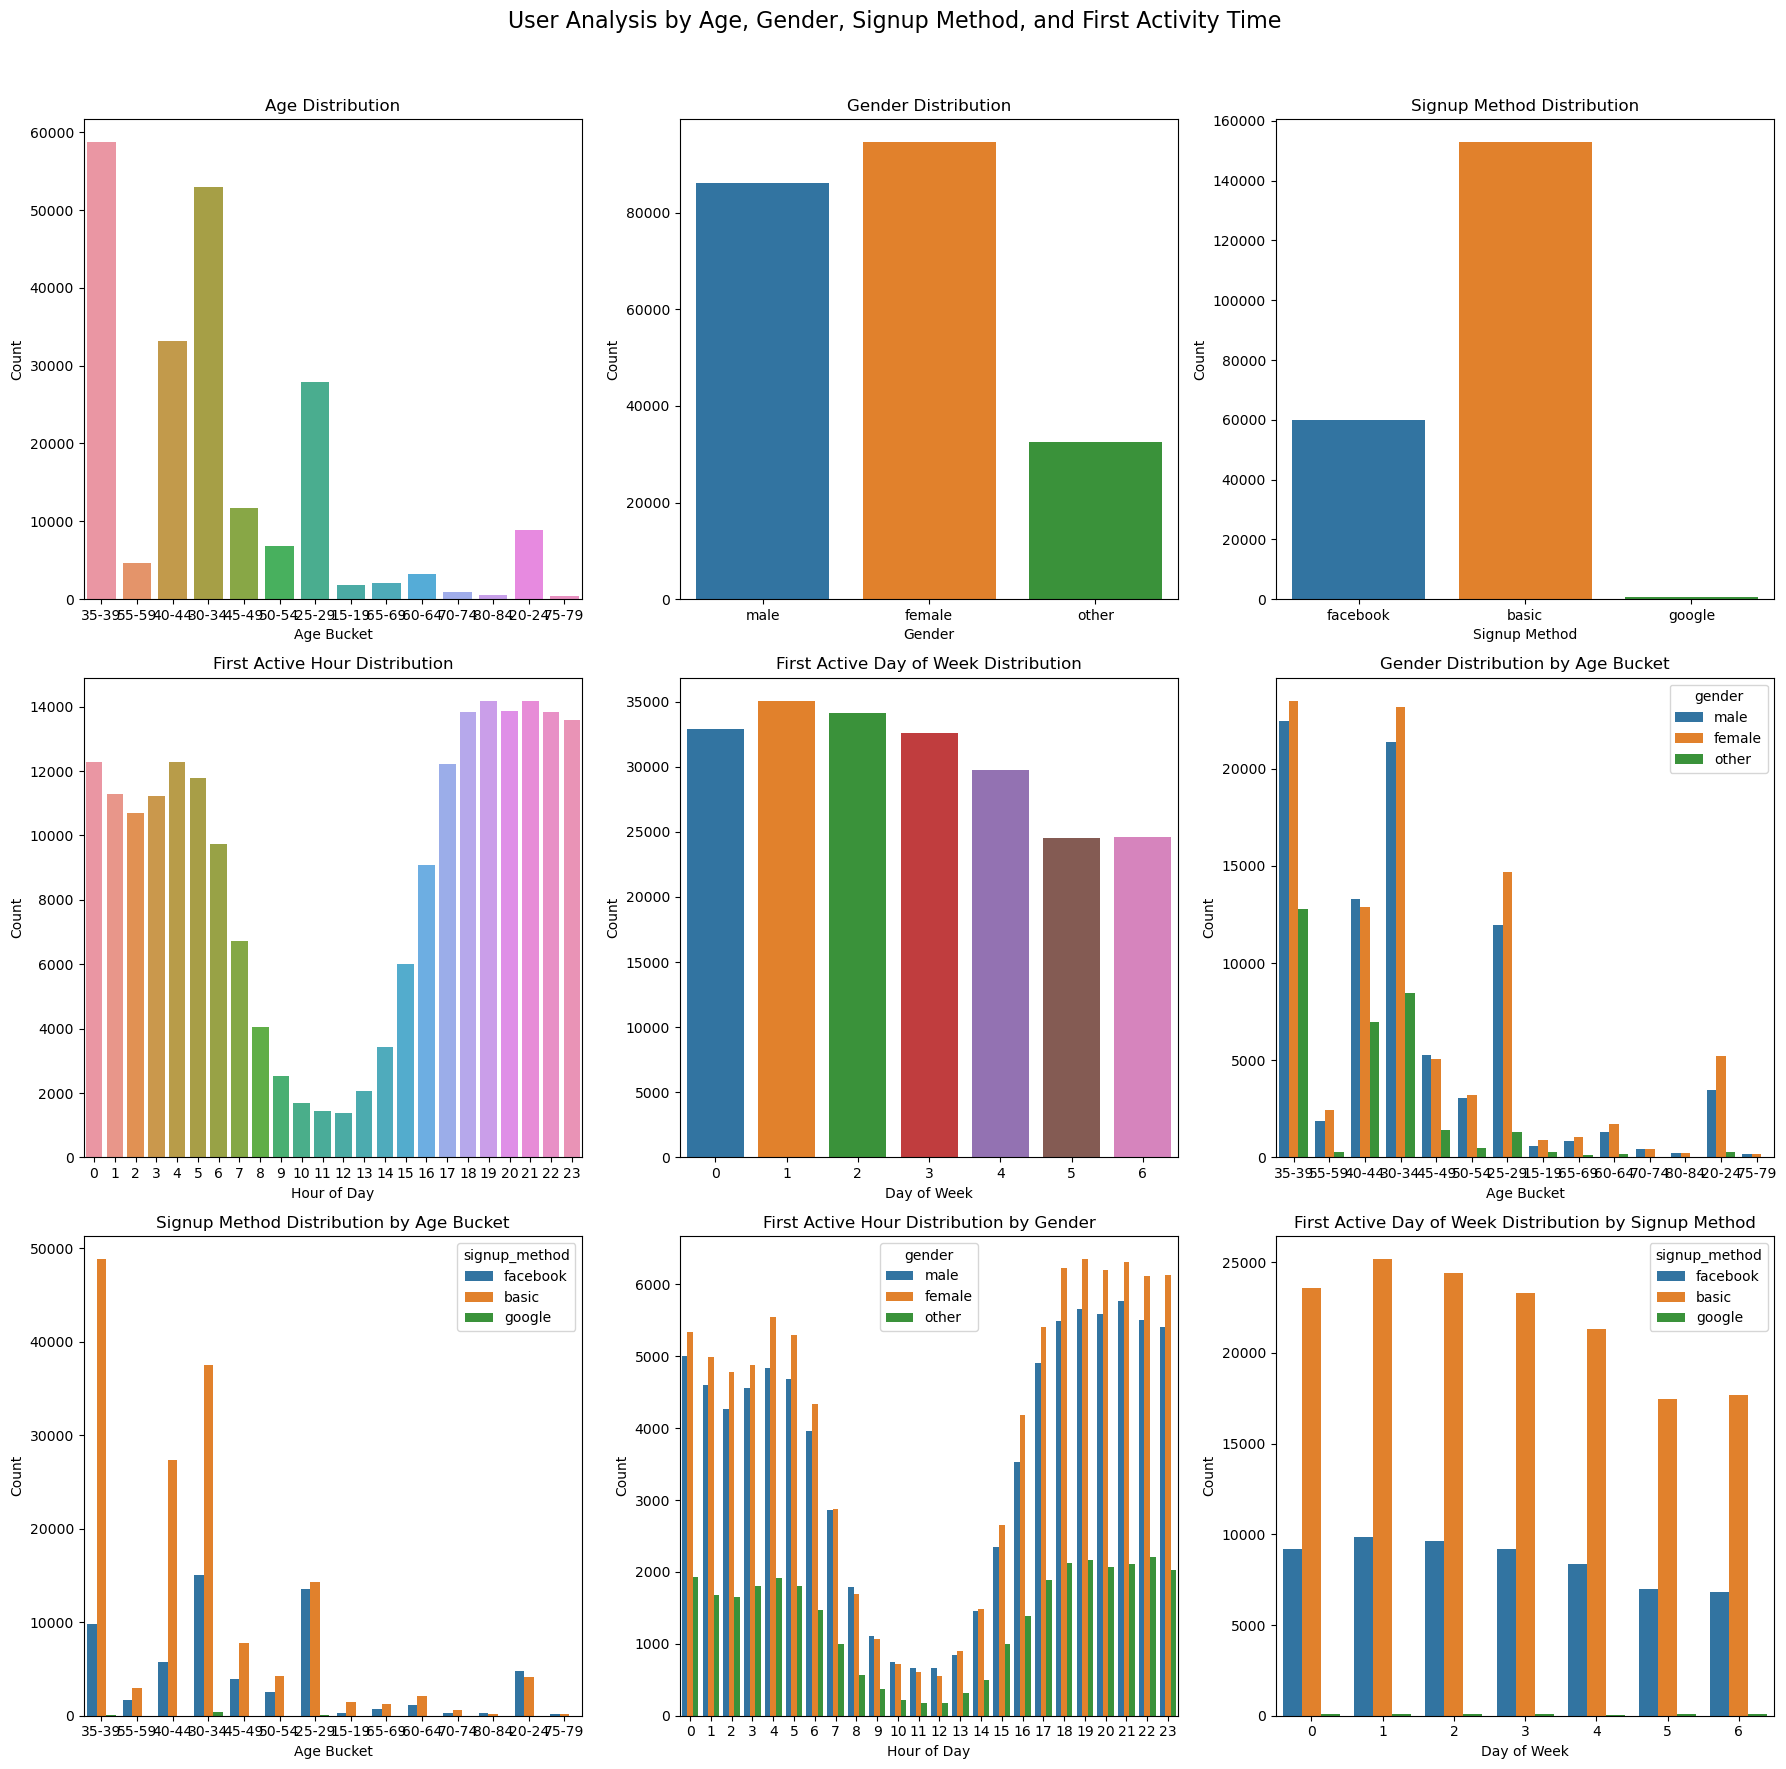

In [7]:
# 첫 활동 시각 변환
train['timestamp_first_active'] = pd.to_datetime(train['timestamp_first_active'], format='%Y%m%d%H%M%S')
train['first_active_hour'] = train['timestamp_first_active'].dt.hour
train['first_active_dayofweek'] = train['timestamp_first_active'].dt.dayofweek


# 서브플롯 생성
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('User Analysis by Age, Gender, Signup Method, and First Activity Time', fontsize=16)

# 연령대 분포
sns.countplot(data=train, x='age_bucket', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Bucket')
axes[0, 0].set_ylabel('Count')

# 성별 분포
sns.countplot(data=train, x='gender', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# 가입 방법 분포
sns.countplot(data=train, x='signup_method', ax=axes[0, 2])
axes[0, 2].set_title('Signup Method Distribution')
axes[0, 2].set_xlabel('Signup Method')
axes[0, 2].set_ylabel('Count')

# 첫 활동 시각 (시간대별) 분포
sns.countplot(data=train, x='first_active_hour', ax=axes[1, 0])
axes[1, 0].set_title('First Active Hour Distribution')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Count')

# 첫 활동 시각 (요일별) 분포
sns.countplot(data=train, x='first_active_dayofweek', ax=axes[1, 1])
axes[1, 1].set_title('First Active Day of Week Distribution')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Count')

# 연령대별 성별 분포
sns.countplot(data=train, x='age_bucket', hue='gender', ax=axes[1, 2])
axes[1, 2].set_title('Gender Distribution by Age Bucket')
axes[1, 2].set_xlabel('Age Bucket')
axes[1, 2].set_ylabel('Count')

# 연령대별 가입 방법 분포
sns.countplot(data=train, x='age_bucket', hue='signup_method', ax=axes[2, 0])
axes[2, 0].set_title('Signup Method Distribution by Age Bucket')
axes[2, 0].set_xlabel('Age Bucket')
axes[2, 0].set_ylabel('Count')

# 성별에 따른 첫 활동 시각 (시간대별) 분포
sns.countplot(data=train, x='first_active_hour', hue='gender', ax=axes[2, 1])
axes[2, 1].set_title('First Active Hour Distribution by Gender')
axes[2, 1].set_xlabel('Hour of Day')
axes[2, 1].set_ylabel('Count')

# 가입 방법에 따른 첫 활동 시각 (요일별) 분포
sns.countplot(data=train, x='first_active_dayofweek', hue='signup_method', ax=axes[2, 2])
axes[2, 2].set_title('First Active Day of Week Distribution by Signup Method')
axes[2, 2].set_xlabel('Day of Week')
axes[2, 2].set_ylabel('Count')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. 시장 트랜드 분석

#### (분석 목적)
- 특정 시기에 특정 국가로의 예약이 증가하는 패턴을 파악함으로써, 해당 시기에 집중적인 마케팅 캠페인 계획 및 실시
- 특정 국가로의 예약 증가 패턴을 분석하여, 향후 수요를 예측하고 이에 맞춰 숙소, 호스트, 지원 인력 등의 자원을 효율적으로 배분
- 특정 시기에 예약이 증가하는 패턴을 이해함으로써, 가격 전략을 최적화

#### (주요 결과 - 가장 많이 방문하는 상위 4개 국가 대상)
- 에어비앤비 이용자는 미국을 가장 많이 방문하는 경향을 보임
- 4개 국가는 2012년 이후 방문이 증가, 2014년 후반 이후 감소하는 경향을 보임
- 미국의 경우는 2013년 이후 급격한 방문 증가, 2014년 이후 급격한 감소를 보임
- 프랑스는 2010년 5월에 이전 3개월 평균보다 예약수가 1.5배 이상 증가하는 패턴을 보임
- 이탈리아는 매년 1~5월 사이에 예약수가 급증하는 패턴을 보임
- 영국은 매년 6~8월 사이에 예약수가 급증하는 패턴을 보임

In [8]:
# 날짜 형식 변환
train['date_account_created'] = pd.to_datetime(train['date_account_created'])
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'])

# 'NDF'와 'other'를 제외한 데이터 필터링
bookings = train[train['country_destination'].notnull() & 
                          ~train['country_destination'].isin(['NDF', 'other'])]

# 'date_first_booking'이 있는 데이터만 사용
bookings = bookings[bookings['date_first_booking'].notnull()]

# 월별 예약 수 계산
bookings['month_year'] = bookings['date_first_booking'].dt.to_period('M')
monthly_bookings = bookings.groupby(['month_year', 'country_destination']).size().reset_index(name='booking_count')

# 월별 예약 수 피벗 테이블 생성
monthly_bookings_pivot = monthly_bookings.pivot(index='month_year', columns='country_destination', values='booking_count').fillna(0)

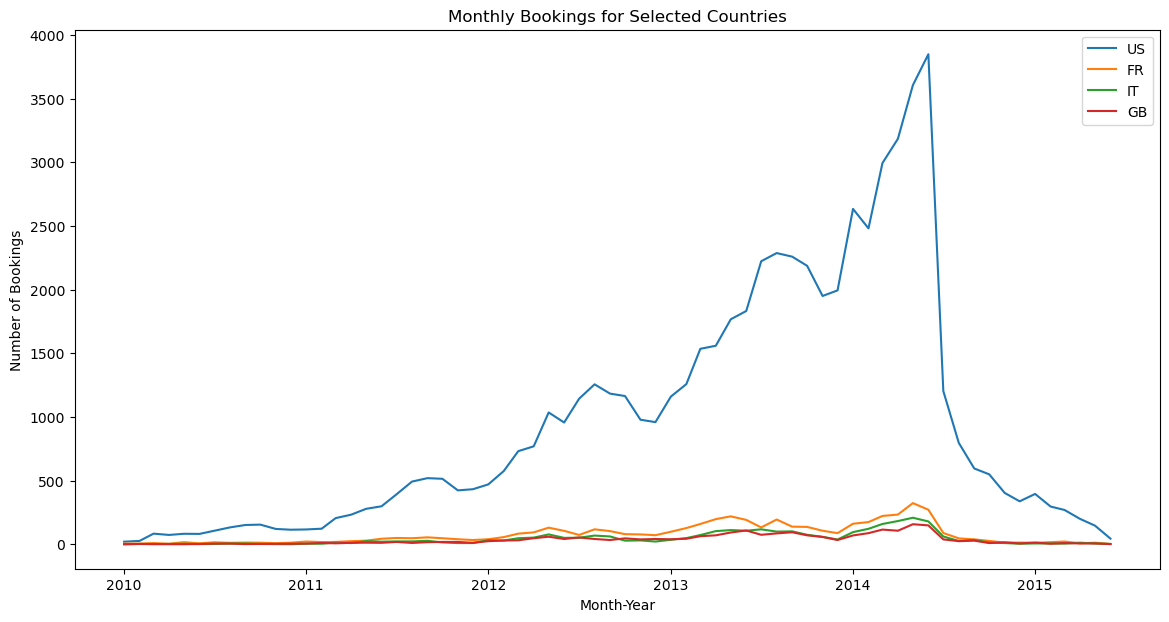

In [9]:
# 상위 4개 국가 대상
selected_countries = ['US', 'FR', 'IT', 'GB']

# 시계열 데이터 시각화
plt.figure(figsize=(14, 7))

for country in selected_countries:
    plt.plot(monthly_bookings_pivot.index.to_timestamp(), monthly_bookings_pivot[country], label=country)

plt.title('Monthly Bookings for Selected Countries')
plt.xlabel('Month-Year')
plt.ylabel('Number of Bookings')
plt.legend()
plt.show()

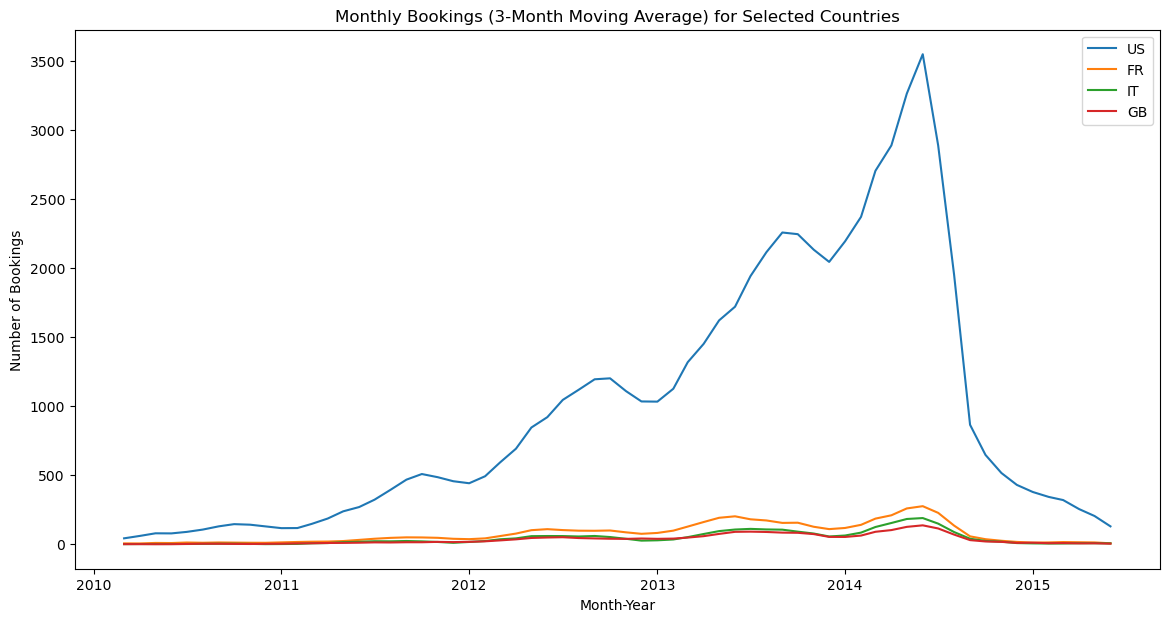

In [10]:
# 이동 평균 계산
monthly_bookings_pivot_ma = monthly_bookings_pivot.rolling(window=3, center=False).mean()

# 시계열 데이터 시각화 (이동 평균)
plt.figure(figsize=(14, 7))

for country in selected_countries:
    plt.plot(monthly_bookings_pivot_ma.index.to_timestamp(), monthly_bookings_pivot_ma[country], label=country)

plt.title('Monthly Bookings (3-Month Moving Average) for Selected Countries')
plt.xlabel('Month-Year')
plt.ylabel('Number of Bookings')
plt.legend()
plt.show()

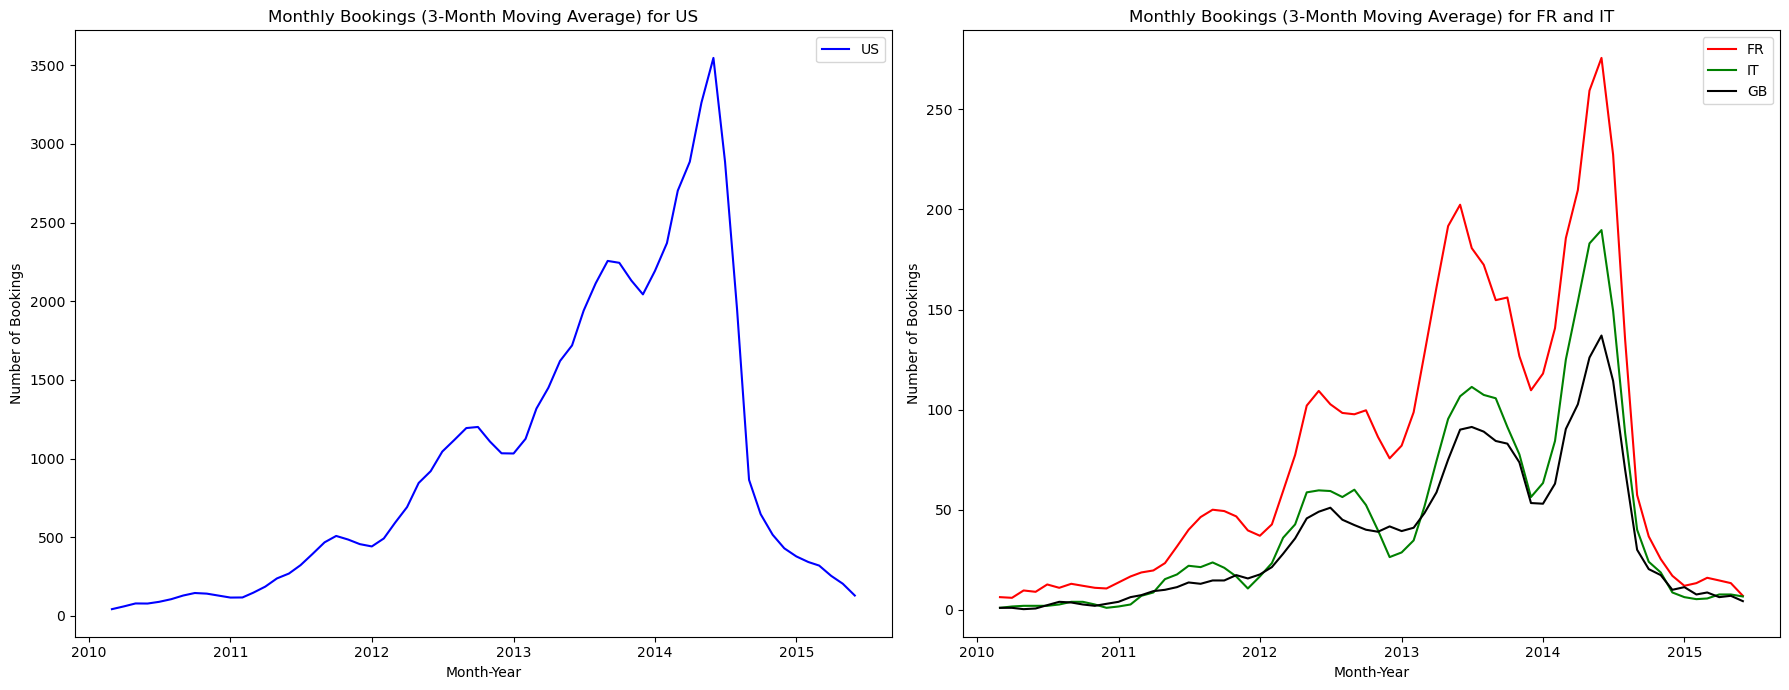

In [11]:
# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 미국 이동 평균 그래프
axes[0].plot(monthly_bookings_pivot_ma.index.to_timestamp(), monthly_bookings_pivot_ma['US'], label='US', color='blue')
axes[0].set_title('Monthly Bookings (3-Month Moving Average) for US')
axes[0].set_xlabel('Month-Year')
axes[0].set_ylabel('Number of Bookings')
axes[0].legend()

# 프랑스와 이탈리아 이동 평균 그래프
axes[1].plot(monthly_bookings_pivot_ma.index.to_timestamp(), monthly_bookings_pivot_ma['FR'], label='FR', color='red')
axes[1].plot(monthly_bookings_pivot_ma.index.to_timestamp(), monthly_bookings_pivot_ma['IT'], label='IT', color='green')
axes[1].plot(monthly_bookings_pivot_ma.index.to_timestamp(), monthly_bookings_pivot_ma['GB'], label='GB', color='black')
axes[1].set_title('Monthly Bookings (3-Month Moving Average) for FR and IT')
axes[1].set_xlabel('Month-Year')
axes[1].set_ylabel('Number of Bookings')
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [12]:
# 특정 시점에 예약이 증가하는 패턴 탐색
increase_threshold = 1.5  # 예약 수가 이전 3개월 평균보다 1.5배 이상 증가하는 경우

monthly_bookings_pivot_ma_shifted = monthly_bookings_pivot_ma.shift(1)
increase_periods = (monthly_bookings_pivot_ma > increase_threshold * monthly_bookings_pivot_ma_shifted)

# 예약 수 급증 시점 출력
for country in selected_countries:
    print(f"\n{country} - 예약수 급증 시점:")
    print(increase_periods[increase_periods[country]].index)


US - 예약수 급증 시점:
PeriodIndex([], dtype='period[M]', name='month_year')

FR - 예약수 급증 시점:
PeriodIndex(['2010-05'], dtype='period[M]', name='month_year')

IT - 예약수 급증 시점:
PeriodIndex(['2010-04', '2011-01', '2011-02', '2011-03', '2011-05', '2012-01',
             '2012-03'],
            dtype='period[M]', name='month_year')

GB - 예약수 급증 시점:
PeriodIndex(['2010-06', '2010-07', '2010-08', '2011-02'], dtype='period[M]', name='month_year')


# 3. 특정 국가 방문자 분석

#### (분석 목적)
- 특정 국가를 방문하는 사용자 특성을 파악하여 맞춤형 마케팅 전략 수립
- 국가별 사용자 특성에 맞춰 서비스를 최적화
- 예를 들어, 특정 시간대에 많이 활동하는 사용자가 많은 국가에서는 해당 시간대에 맞춘 서비스 강화 전략을 수립

#### (주요 결과 - 가장 많이 방문하는 미국과 가장 적게 방문하는 포르투갈 비교) 
- 미국과 포르투갈은 30대 여성이 주로 방문하며, 주로 저녁과 새벽에 예약을 하는 등 대체로 유사한 경향을 보임
- device type은 미국 방문자의 경우, Mac desktop이 다수를 이루었으나, 포르투갈 방문자의 경우, Mac desktop과 Window desktop이 거의 비슷한 경향을 보임
- 미국 방문자의 에어비앤비 홈페이지 평균 체류시간은 45.63분, 포르투갈 방문자의 에어비앤비 홈페이지 평균 체류시간: 42.97분으로 나타났으며, t-검정을 통해 통계적으로 유의성이 있음을 확인함

In [13]:
# 첫 활동 시각 변환
train['timestamp_first_active'] = pd.to_datetime(train['timestamp_first_active'], format='%Y%m%d%H%M%S')
train['first_active_hour'] = train['timestamp_first_active'].dt.hour
train['first_active_dayofweek'] = train['timestamp_first_active'].dt.dayofweek

# 미국과 포르투갈를 예약한 사람들 필터링
us_users = train[train['country_destination'] == 'US']
pt_users = train[train['country_destination'] == 'PT']

# sessions_clean.csv 데이터 전처리
session['action'].fillna('unknown', inplace=True)
session['action_type'].fillna('unknown', inplace=True)
session['action_detail'].fillna('unknown', inplace=True)
session['device_type'].fillna('unknown', inplace=True)
session['secs_elapsed'].fillna(0, inplace=True)

# 사용자 ID로 세션 데이터 요약
session_aggregates = session.groupby('user_id').agg({
    'action': lambda x: x.mode()[0],  # 가장 빈도가 높은 action
    'action_type': lambda x: x.mode()[0],  # 가장 빈도가 높은 action_type
    'action_detail': lambda x: x.mode()[0],  # 가장 빈도가 높은 action_detail
    'device_type': lambda x: x.mode()[0],  # 가장 빈도가 높은 device_type
    'secs_elapsed': 'sum'  # 총 사용 시간
}).reset_index()

# 미국 사용자에 대한 세션 데이터 병합
us_users_sessions = pd.merge(us_users, session_aggregates, left_on='id', right_on='user_id', how='inner')

# 포르투갈 사용자에 대한 세션 데이터 병합
pt_users_sessions = pd.merge(pt_users, session_aggregates, left_on='id', right_on='user_id', how='inner')

In [14]:
# 상위 10개의 행동과 행동 세부 사항 필터링 함수
def get_top_n(data, column, n=10):
    top_n_values = data[column].value_counts().nlargest(n).index
    return data[data[column].isin(top_n_values)]

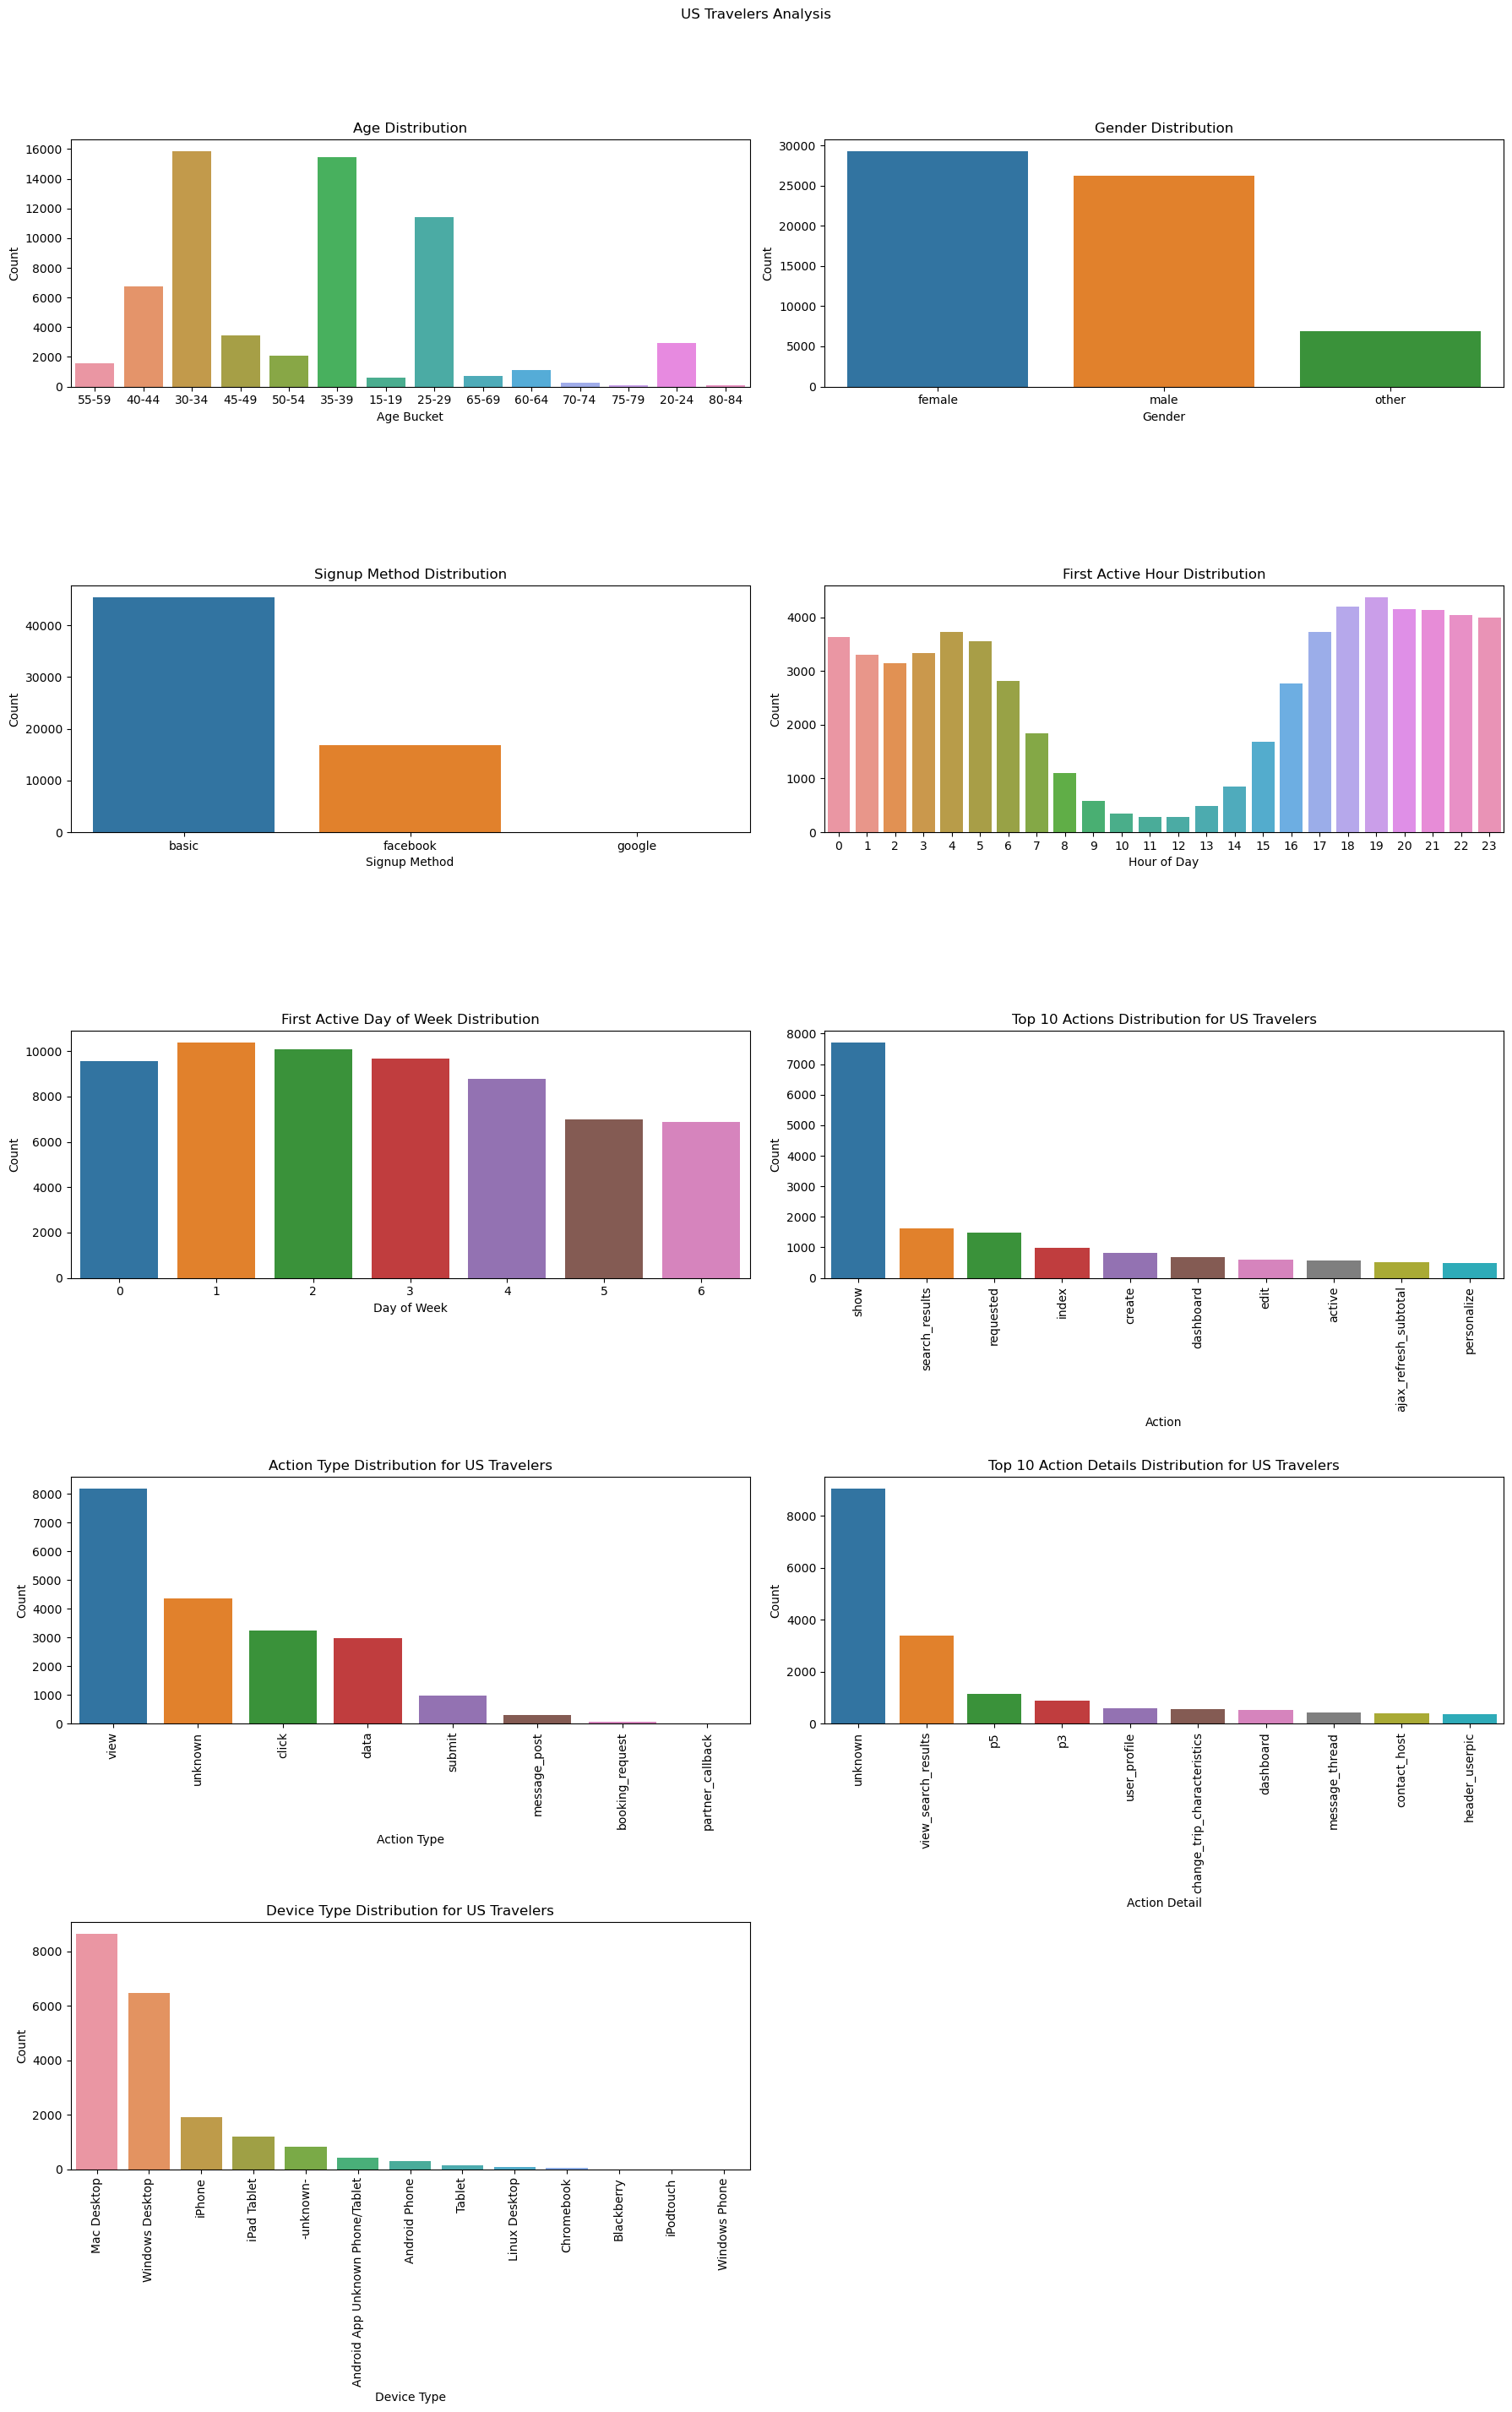

In [15]:
# 서브플롯 생성 (미국 - 5행 2열)
fig, axes = plt.subplots(5, 2, figsize=(18, 30))
fig.suptitle('US Travelers Analysis')

# 연령대 분포 (미국)
sns.countplot(data=us_users, x='age_bucket', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Bucket')
axes[0, 0].set_ylabel('Count')

# 성별 분포 (미국)
sns.countplot(data=us_users, x='gender', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# 가입 방법 분포 (미국)
sns.countplot(data=us_users, x='signup_method', ax=axes[1, 0])
axes[1, 0].set_title('Signup Method Distribution')
axes[1, 0].set_xlabel('Signup Method')
axes[1, 0].set_ylabel('Count')

# 첫 활동 시각 (시간대별) 분포 (미국)
sns.countplot(data=us_users, x='first_active_hour', ax=axes[1, 1])
axes[1, 1].set_title('First Active Hour Distribution')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Count')

# 첫 활동 시각 (요일별) 분포 (미국)
sns.countplot(data=us_users, x='first_active_dayofweek', ax=axes[2, 0])
axes[2, 0].set_title('First Active Day of Week Distribution')
axes[2, 0].set_xlabel('Day of Week')
axes[2, 0].set_ylabel('Count')

# 행동 분포 (미국)
top_10_actions_us = get_top_n(us_users_sessions, 'action')
sns.countplot(data=top_10_actions_us, x='action', order=top_10_actions_us['action'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('Top 10 Actions Distribution for US Travelers')
axes[2, 1].set_xlabel('Action')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=90)

# 행동 유형 분포 (미국)
sns.countplot(data=us_users_sessions, x='action_type', order=us_users_sessions['action_type'].value_counts().index, ax=axes[3, 0])
axes[3, 0].set_title('Action Type Distribution for US Travelers')
axes[3, 0].set_xlabel('Action Type')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x', rotation=90)

# 행동 세부 사항 분포 (미국)
top_10_action_details_us = get_top_n(us_users_sessions, 'action_detail')
sns.countplot(data=top_10_action_details_us, x='action_detail', order=top_10_action_details_us['action_detail'].value_counts().index, ax=axes[3, 1])
axes[3, 1].set_title('Top 10 Action Details Distribution for US Travelers')
axes[3, 1].set_xlabel('Action Detail')
axes[3, 1].set_ylabel('Count')
axes[3, 1].tick_params(axis='x', rotation=90)

# 장치 유형 분포 (미국)
sns.countplot(data=us_users_sessions, x='device_type', order=us_users_sessions['device_type'].value_counts().index, ax=axes[4, 0])
axes[4, 0].set_title('Device Type Distribution for US Travelers')
axes[4, 0].set_xlabel('Device Type')
axes[4, 0].set_ylabel('Count')
axes[4, 0].tick_params(axis='x', rotation=90)

# 빈 그래프 제거 (미국)
fig.delaxes(axes[4, 1])

# 레이아웃 조정 (미국)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

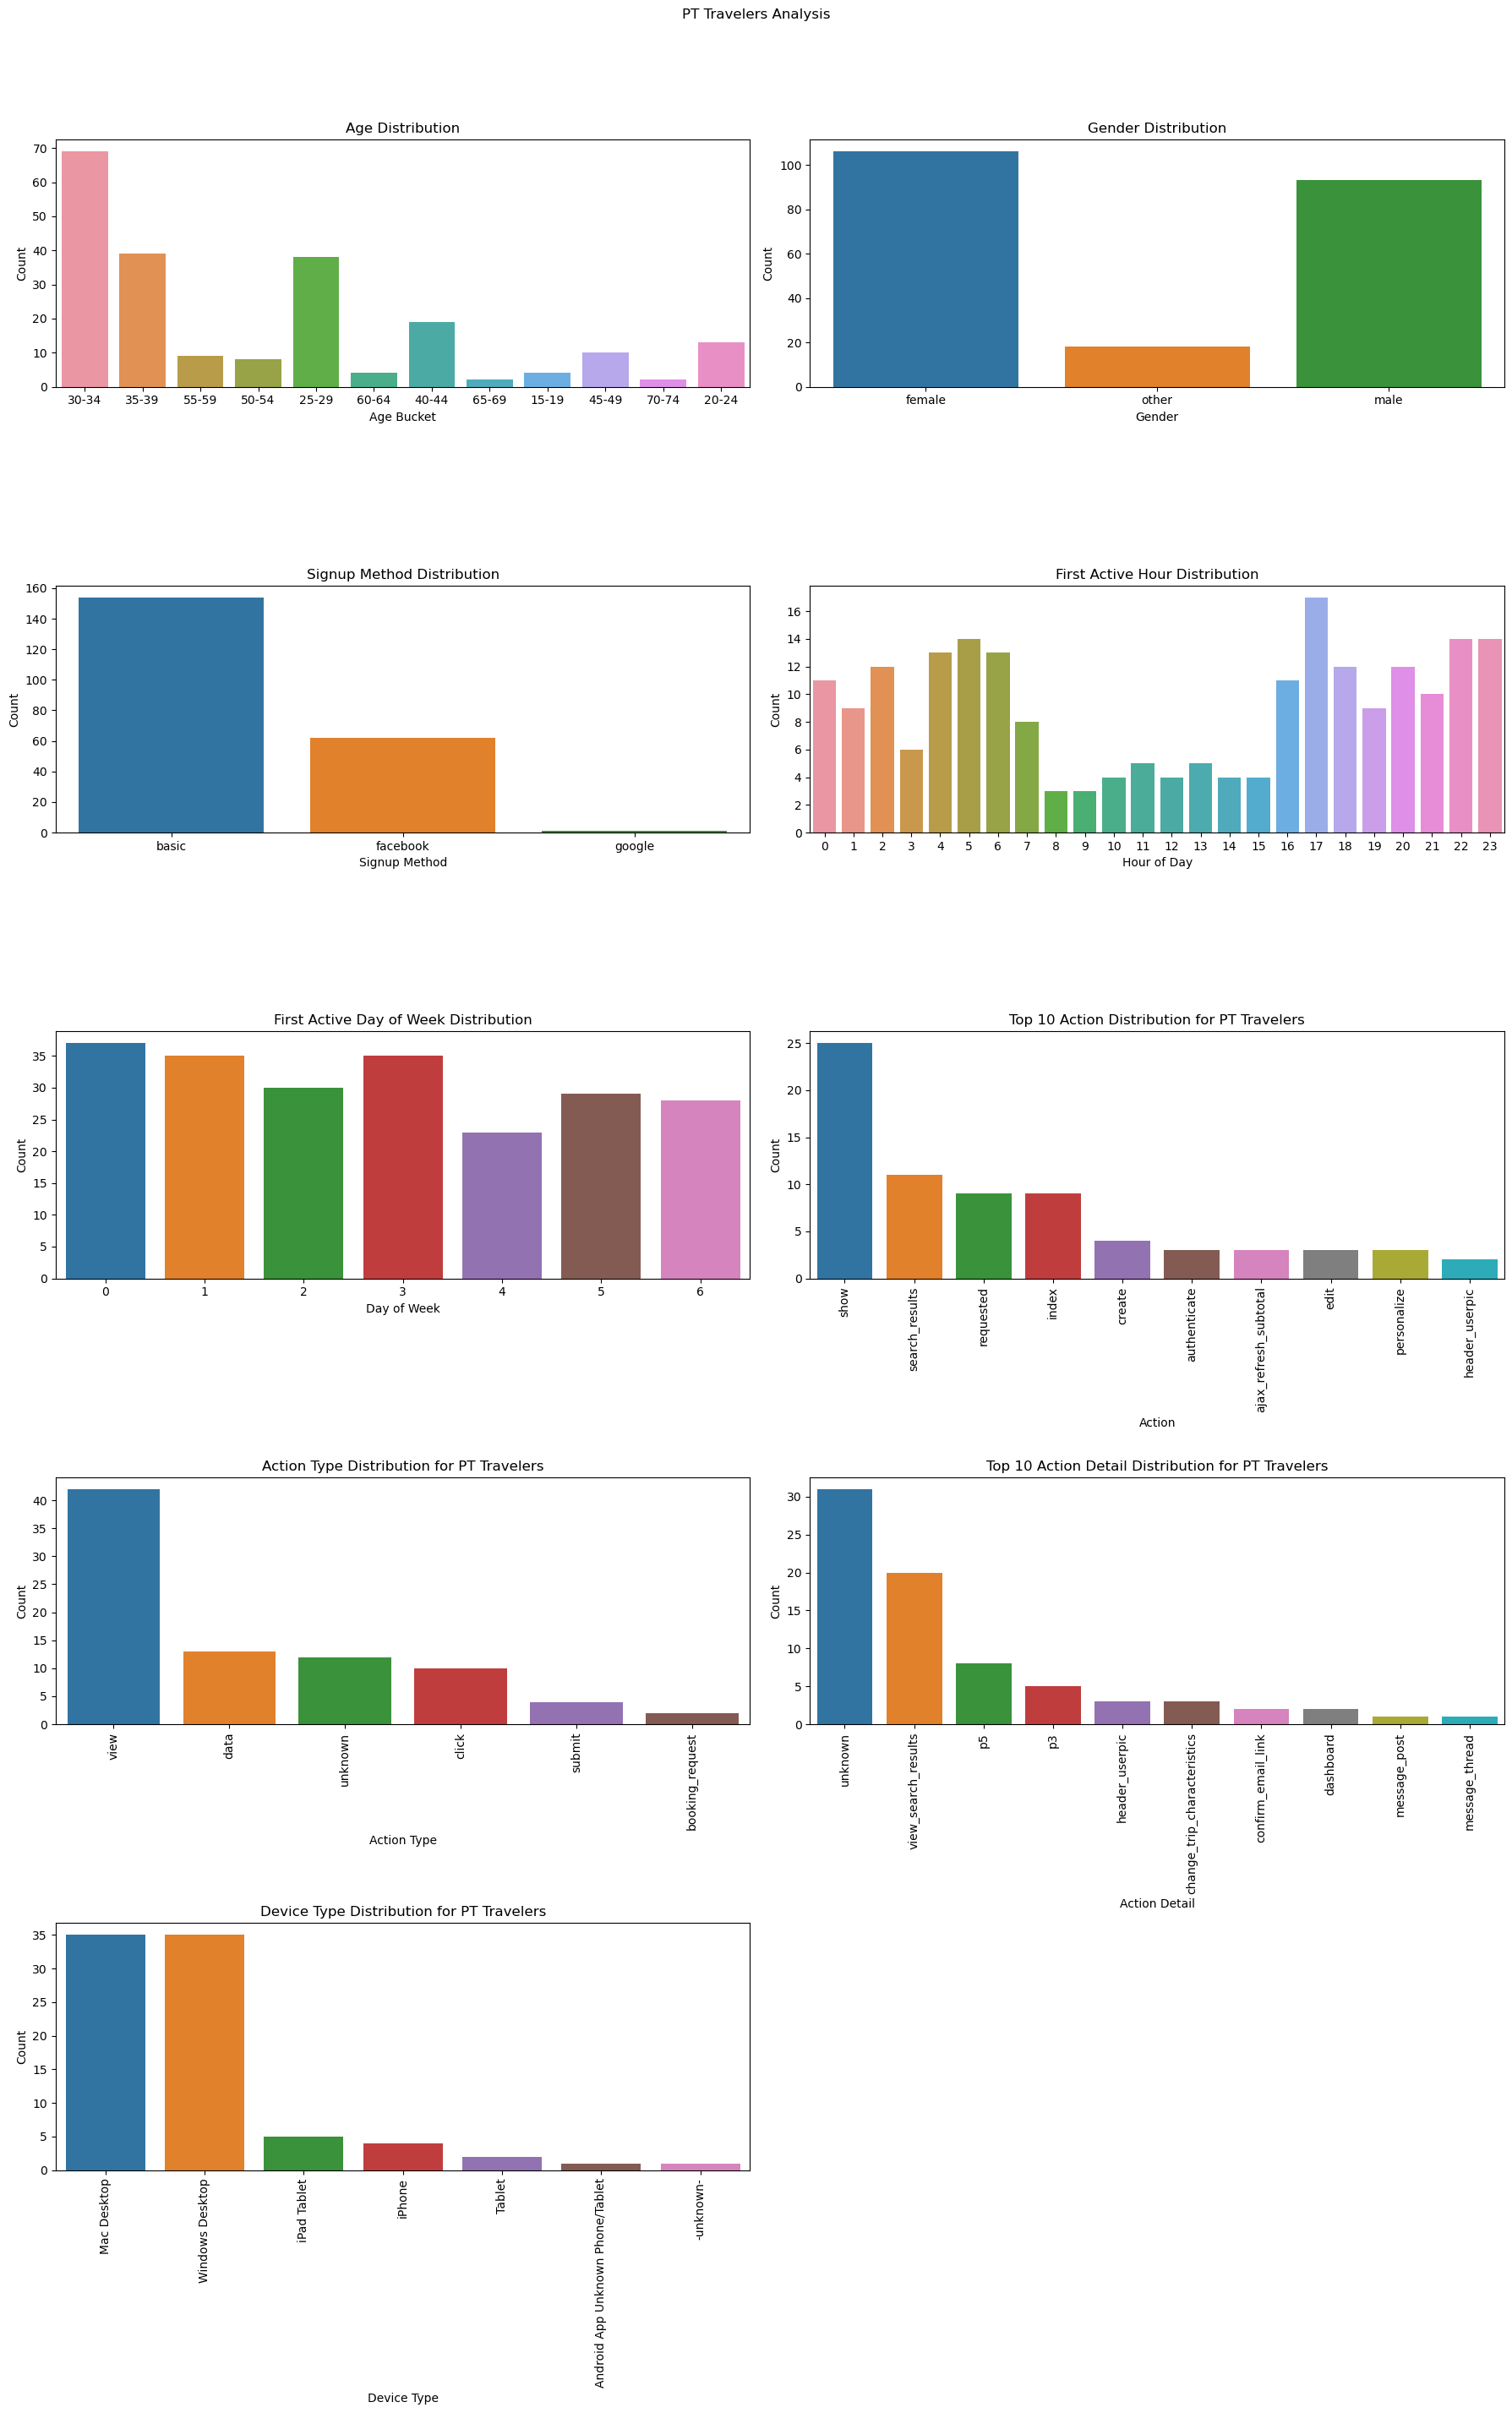

In [16]:
# 서브플롯 생성 (포르투갈- 5행 2열)
fig, axes = plt.subplots(5, 2, figsize=(18, 30))
fig.suptitle('PT Travelers Analysis')

# 연령대 분포 (포르투갈)
sns.countplot(data=pt_users, x='age_bucket', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Bucket')
axes[0, 0].set_ylabel('Count')

# 성별 분포 (포르투갈)
sns.countplot(data=pt_users, x='gender', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# 가입 방법 분포 (포르투갈)
sns.countplot(data=pt_users, x='signup_method', ax=axes[1, 0])
axes[1, 0].set_title('Signup Method Distribution')
axes[1, 0].set_xlabel('Signup Method')
axes[1, 0].set_ylabel('Count')

# 첫 활동 시각 (시간대별) 분포 (포르투갈)
sns.countplot(data=pt_users, x='first_active_hour', ax=axes[1, 1])
axes[1, 1].set_title('First Active Hour Distribution')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Count')

# 첫 활동 시각 (요일별) 분포 (포르투갈)
sns.countplot(data=pt_users, x='first_active_dayofweek', ax=axes[2, 0])
axes[2, 0].set_title('First Active Day of Week Distribution')
axes[2, 0].set_xlabel('Day of Week')
axes[2, 0].set_ylabel('Count')

# 행동 분포 (포르투갈) 
top_10_actions_pt = pt_users_sessions['action'].value_counts().nlargest(10).index
sns.countplot(data=pt_users_sessions[pt_users_sessions['action'].isin(top_10_actions_pt)], x='action', order=top_10_actions_pt, ax=axes[2, 1])
axes[2, 1].set_title('Top 10 Action Distribution for PT Travelers')
axes[2, 1].set_xlabel('Action')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=90)

# 행동 유형 분포 (포르투갈)
sns.countplot(data=pt_users_sessions, x='action_type', order=pt_users_sessions['action_type'].value_counts().index, ax=axes[3, 0])
axes[3, 0].set_title('Action Type Distribution for PT Travelers')
axes[3, 0].set_xlabel('Action Type')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x', rotation=90)

# 행동 세부 사항 분포 (포르투갈) 
top_10_action_details_pt = pt_users_sessions['action_detail'].value_counts().nlargest(10).index
sns.countplot(data=pt_users_sessions[pt_users_sessions['action_detail'].isin(top_10_action_details_pt)], x='action_detail', order=top_10_action_details_pt, ax=axes[3, 1])
axes[3, 1].set_title('Top 10 Action Detail Distribution for PT Travelers')
axes[3, 1].set_xlabel('Action Detail')
axes[3, 1].set_ylabel('Count')
axes[3, 1].tick_params(axis='x', rotation=90)

# 장치 유형 분포 (포르투갈)
sns.countplot(data=pt_users_sessions, x='device_type', order=pt_users_sessions['device_type'].value_counts().index, ax=axes[4, 0])
axes[4, 0].set_title('Device Type Distribution for PT Travelers')
axes[4, 0].set_xlabel('Device Type')
axes[4, 0].set_ylabel('Count')
axes[4, 0].tick_params(axis='x', rotation=90)


# 빈 그래프 제거 (포르투갈)
fig.delaxes(axes[4, 1])

# 레이아웃 조정 (포르투갈)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
# 이상치 제거 함수
def remove_outliers(series, df):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(series >= lower_bound) & (series <= upper_bound)]

In [18]:
# 사용자 평균 체류시간 산정을 위한 데이터 셋 병합
users_merge = pd.merge(session, train, left_on='user_id', right_on='id', how='left')

# 미국 방문자 필터링 및 이상치 제거
us_users_merge = users_merge[users_merge['country_destination'] == 'US']
us_users_clean = remove_outliers(us_users_merge['secs_elapsed'], us_users_merge)

# 포르투갈 방문자 필터링 및 이상치 제거
pt_users_merge = users_merge[users_merge['country_destination'] == 'PT']
pt_users_clean = remove_outliers(pt_users_merge['secs_elapsed'], pt_users_merge)


# 미국 방문자의 에어비앤비 홈페이지 평균 체류시간 (분)
us_mean_min_elapsed = round(us_users_clean['secs_elapsed'].mean() / 60, 2)
print(f"미국 방문자의 에어비앤비 홈페이지 평균 체류시간: {us_mean_min_elapsed} 분")

# 포르투갈 방문자의 에어비앤비 홈페이지 평균 체류시간 (분)
pt_mean_min_elapsed = round(pt_users_clean['secs_elapsed'].mean() / 60, 2)
print(f"포르투갈 방문자의 에어비앤비 홈페이지 평균 체류시간: {pt_mean_min_elapsed} 분")

미국 방문자의 에어비앤비 홈페이지 평균 체류시간: 45.63 분
포르투갈 방문자의 에어비앤비 홈페이지 평균 체류시간: 42.97 분


In [19]:
from scipy.stats import ttest_ind

# 데이터 준비
us_secs_elapsed = us_users_clean['secs_elapsed'] / 60  # 초를 분으로 변환
pt_secs_elapsed = pt_users_clean['secs_elapsed'] / 60  # 초를 분으로 변환

# 귀무 가설(H0): 두 그룹의 평균 체류시간에는 차이가 없다.
# 대립 가설(H1): 두 그룹의 평균 체류시간에는 차이가 있다.

# 독립 표본 t-검정 수행
t_stat, p_value = ttest_ind(us_secs_elapsed, pt_secs_elapsed)

# 결과 출력
print(f"t-통계량: {t_stat}")
print(f"p-값: {p_value}")

# 유의수준 0.05에서 귀무가설 채택 여부 판단
alpha = 0.05
if p_value < alpha:
    print("두 그룹의 평균 체류시간 차이는 통계적으로 유의합니다. (귀무 가설 기각)")
else:
    print("두 그룹의 평균 체류시간 차이는 통계적으로 유의하지 않습니다. (귀무 가설 채택)")

t-통계량: 2.581873552242256
p-값: 0.009826657171890817
두 그룹의 평균 체류시간 차이는 통계적으로 유의합니다. (귀무 가설 기각)


# 4. 예약 전환율 분석

#### (분석 목적)
- 사용자의 특성과 행동이 예약 전환율에 미치는 영향을 분석
- 특정 가입 방법이나 언어를 사용하는 사용자의 전환율이 다른지 분석
- 예약 전환율에 영향을 미치는 주요 요인들을 식별하고, 전환율을 높이기 위한 전략을 제안하기 위함

#### (주요 결과)
- basic(이메일 주소를 통해 계정을 생성) 방법이 예약 전환율이 가장 높은 경향을 보임
- facebook singup 방법도 사용자 수는 상대적으로 적으나 비교적 높은 예약 전환율을 보임
- 대부분의 언어에서 대체로 유사한 예약 전환율을 보임
- 언어 사용자 수에서는 영어가 압도적으로 많아, 영어 사용자의 예약 전환율을 상대적으로 높은 경향을 보임
- 영어 이외의 다른 언어의 예약 전환율은 사용자 수가 적어 유의성을 찾기 어려워 보임

In [20]:
# 결측치 처리 및 필요 컬럼 생성
train['date_account_created'] = pd.to_datetime(train['date_account_created'])
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'])

# 'booked' 컬럼 생성 (예약 여부를 나타내는 이진 변수)
train['booked'] = ~train['date_first_booking'].isna()

# 필요한 컬럼 선택
features = ['id', 'signup_method', 'language', 'booked']

# 필요한 컬럼으로 새로운 데이터프레임 생성
data = train[features]

In [21]:
# 가입 방법별 전환율 계산
signup_method_conversion = data.groupby('signup_method')['booked'].mean().reset_index()
signup_method_conversion.columns = ['signup_method', 'conversion_rate']

# 가입 방법별 사용자 수
signup_method_count = data['signup_method'].value_counts().reset_index()
signup_method_count.columns = ['signup_method', 'count']

# 데이터 병합
signup_method_analysis = pd.merge(signup_method_conversion, signup_method_count, on='signup_method')

# 언어별 전환율 계산
language_conversion = data.groupby('language')['booked'].mean().reset_index()
language_conversion.columns = ['language', 'conversion_rate']

# 언어별 사용자 수
language_count = data['language'].value_counts().reset_index()
language_count.columns = ['language', 'count']

# 데이터 병합
language_analysis = pd.merge(language_conversion, language_count, on='language')

# 언어별 전환율 시각화와 사용자 수 시각화를 내림차순 정렬
language_analysis_sorted = language_analysis.sort_values(by='conversion_rate', ascending=False)

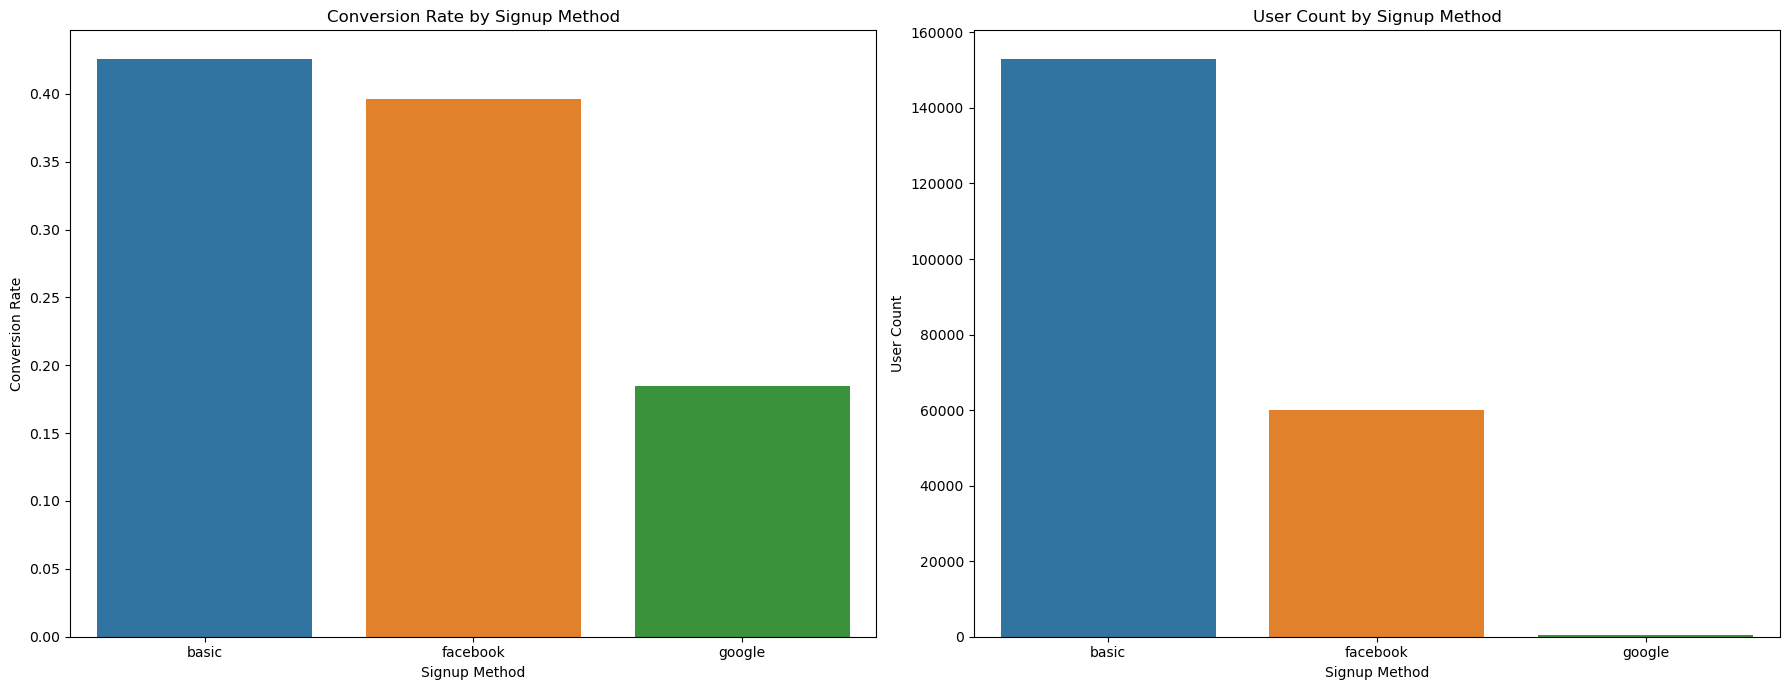

In [22]:
# 가입 방법별 전환율 및 사용자 수 시각화 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(data=signup_method_analysis, x='signup_method', y='conversion_rate', ax=axes[0])
axes[0].set_title('Conversion Rate by Signup Method')
axes[0].set_xlabel('Signup Method')
axes[0].set_ylabel('Conversion Rate')

sns.barplot(data=signup_method_analysis, x='signup_method', y='count', ax=axes[1])
axes[1].set_title('User Count by Signup Method')
axes[1].set_xlabel('Signup Method')
axes[1].set_ylabel('User Count')

plt.tight_layout()
plt.show()

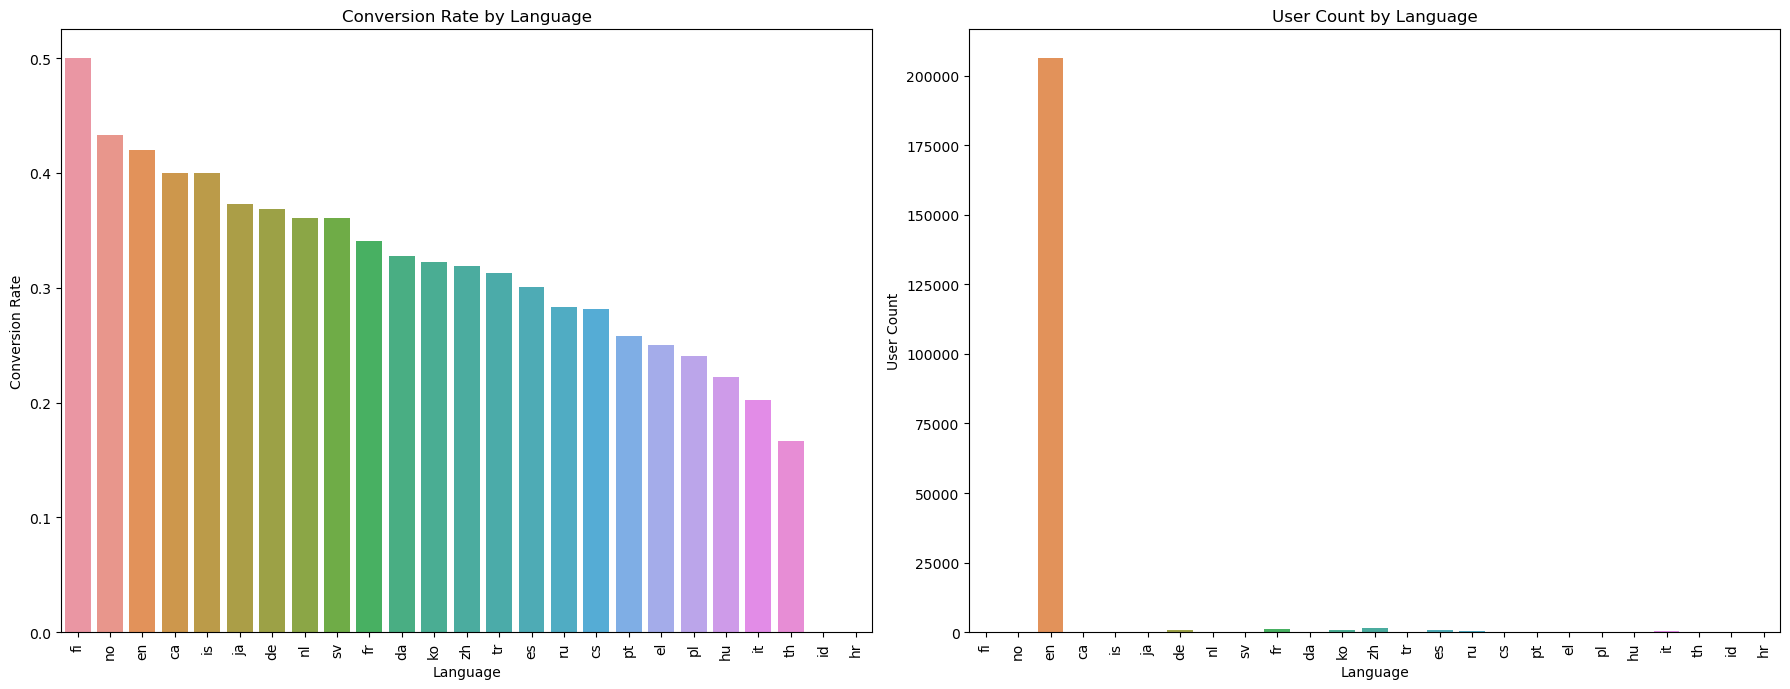

In [23]:
# 언어별 전환율 및 사용자 수 시각화 (1행 2열, 내림차순 정렬)
language_analysis_sorted = language_analysis.sort_values(by='conversion_rate', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(data=language_analysis_sorted, x='language', y='conversion_rate', ax=axes[0])
axes[0].set_title('Conversion Rate by Language')
axes[0].set_xlabel('Language')
axes[0].set_ylabel('Conversion Rate')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=language_analysis_sorted, x='language', y='count', ax=axes[1])
axes[1].set_title('User Count by Language')
axes[1].set_xlabel('Language')
axes[1].set_ylabel('User Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

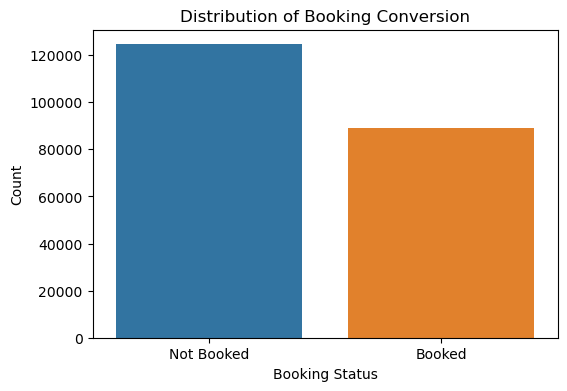

In [24]:
# 'booked' 컬럼 생성 (예약 여부를 나타내는 이진 변수)
train['booked'] = ~train['date_first_booking'].isna()

# 'booked' 컬럼의 값 변경 (0 -> 'Not Booked', 1 -> 'Booked')
train['booked'] = train['booked'].map({True: 'Booked', False: 'Not Booked'})

# 전환율 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='booked')
plt.title('Distribution of Booking Conversion')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

# 5. 종속변수와 수치형 변수간의 상관관계 분석

#### (분석 목적)
- 종속변수에 미치는 영향을 파악하여 모델의 예측 성능 향상
- 비즈니스 전략 수립에 유용한 인사이트 제공
- 예를 들어, 특정 행동이 예약 전환율에 긍정적인 영향을 미친다면, 그 행동을 유도하는 마케팅 전략을 강화

#### (주요 결과)
- 성별과 여행 목적지간에는 상관관계의 유의성이 있는 것으로 나타남
- 연령과 여행 목적지간에는 상관관계의 유의성이 있는 것으로 나타남
- 특정 성별 또는 특정 연령이 특정 국가를 더 선호하는 경향이 있다는 의미로, 해당 국가에 대한 맞춤형 마케팅 캠페인을 성별 또는 연령에 따라 다르게 설계할 수 있음

/var/folders/6c/96vn2k0j65d774fz5mhfmvbh0000gn/T/ipykernel_43927/3516272704.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order2[i]


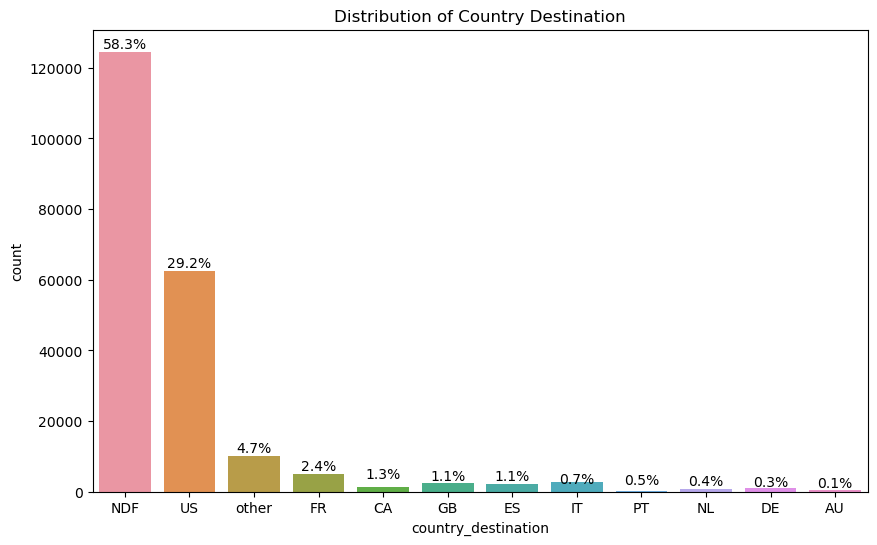

In [25]:
# 타겟 변수 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='country_destination')
plt.title('Distribution of Country Destination')
order2 = train['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train.shape[0])
    plt.text(i,count+1000,strt,ha='center')

plt.show()

#### 5-1. 성별과 여행 목적지간의 상관관계 분석

In [26]:
train['gender'].value_counts()

gender
female    94640
male      86270
other     32541
Name: count, dtype: int64

In [27]:
# 데이터셋에서 필요한 열만 선택하여 데이터프레임 생성
gender_df = train[['gender', 'country_destination']].copy()

gender_df = gender_df[~gender_df['country_destination'].isin(['NDF', 'other'])]

# 교차테이블 생성
contingency_table = pd.crosstab(gender_df['gender'], gender_df['country_destination'])


In [28]:
contingency_table

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
gender,,,,,,,,,,
female,248,616,453,1096,2520,1129,1400,329,106,29250
male,236,656,510,897,1916,937,1056,349,93,26223
other,55,156,98,256,587,258,379,84,18,6903


In [29]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square statistic: 101.26825162463905
P-value: 1.29652417555695e-13


#### 5-2. 성별과 여행 목적지간의 상관관계 분석 결과
- Chi-square statistic(카이제곱 통계량):<br>
값이 클수록 두 변수 사이에 유의미한 관계가 있다고 판단할 수 있음
- p-value :<br>
극단적인 데이터가 나올 확률이 매우 낮다고 판단할 수 있음. 귀무가설을 기각할 수 있음 <br>
그러므로 두 변수는 유의미한 관계가 있다고 판단할 수 있음

#### 5-3. 연령과 여행 목적지간의 상관관계 분석

In [30]:
train['age_bucket'].value_counts()

age_bucket
35-39    58734
30-34    52953
40-44    33114
25-29    27936
45-49    11745
20-24     8914
50-54     6763
55-59     4625
60-64     3183
65-69     2006
15-19     1771
70-74      901
80-84      472
75-79      334
Name: count, dtype: int64

In [31]:
# 데이터셋에서 필요한 열만 선택하여 데이터프레임 생성
age_df = train[['age_bucket', 'country_destination']].copy()

age_df = age_df[~age_df['country_destination'].isin(['NDF', 'other'])]

# 교차테이블 생성
contingency_table = pd.crosstab(age_df['age_bucket'], age_df['country_destination'])
contingency_table

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
age_bucket,,,,,,,,,,
15-19,7,32,18,30,74,30,41,11,4,577
20-24,18,41,64,208,290,142,197,66,13,2944
25-29,88,207,181,371,669,319,381,130,38,11419
30-34,115,340,261,656,1106,455,644,189,69,15841
35-39,130,338,213,450,1148,456,676,159,39,15455
40-44,66,211,125,226,722,337,353,87,19,6774
45-49,48,96,70,109,380,199,197,38,10,3446
50-54,27,72,40,73,252,154,130,23,8,2064
55-59,20,36,33,41,148,92,78,18,9,1572


In [32]:
# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square statistic: 927.0348335456965
P-value: 3.669366524450003e-126


#### 5-4. 연령과 여행 목적지간의 상관관계 분석 결과
- Chi-square statistic(카이제곱 통계량):<br>
값이 클수록 두 변수 사이에 유의미한 관계가 있다고 판단할 수 있음
- p-value :<br>
극단적인 데이터가 나올 확률이 매우 낮다고 판단할 수 있음. 귀무가설을 기각할 수 있음<br>
그러므로 두 변수는 유의미한 관계가 있다고 판단할 수 있음